In [281]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [282]:
# Konstanter
N = 330        # [--] Antall viklinger
R = 70e-3      # [m] gjennomsnittsradius <R>
I = 1.         # [A] strøm 
mu0 = 1.26e-6  # [N/A^2] Vacuum permability
nx = 100

In [283]:
def B(x):
    """ x in meters. """
    factor = N * mu0 * I / (2. * R)
    return factor * (1. + (x/R) ** 2) ** (-3./2)

In [284]:
# Task 1A
data = np.loadtxt('kort_spole.csv', delimiter=',', skiprows=1)
x = data[:,0]
# x = np.linspace(-20, 20, nx+1)*1e-2
B_arr = B(x)*1e4
d = {'x [m]': x, 'B [gauss]': B_arr}
df = pd.DataFrame(data=d)
df

,x [m],B [gauss]
0,0.0000,29.70000
1,0.0000,29.70000
2,0.0000,29.70000
3,0.0000,29.70000
4,0.0000,29.70000
...,...,...
135,-0.0021,29.65995
136,-0.0021,29.65995
137,-0.0021,29.65995
138,-0.0021,29.65995


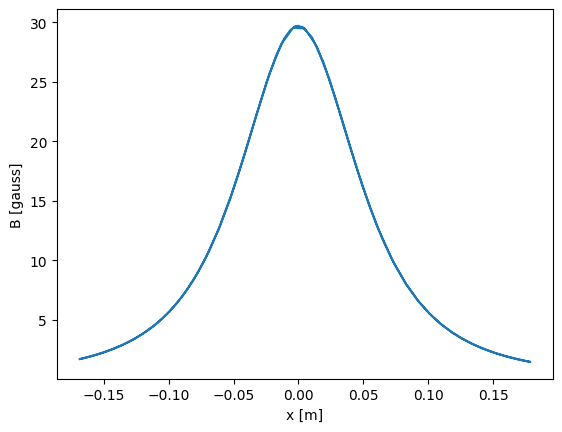

In [285]:
# Task 1B
plt.plot(x, B_arr)
plt.xlabel('x [m]')
plt.ylabel('B [gauss]')
plt.show()

In [286]:
# Task 1C

B_measured = data[:,1]*1e4*100
delta_B = 100. * (B_measured - df['B [gauss]']) / df['B [gauss]']
df.insert(2, 'B målt [gauss]', B_measured)
df.insert(3, 'Delta B [%]', delta_B)
df

,x [m],B [gauss],B målt [gauss],Delta B [%]
0,0.0000,29.70000,25.0,-15.824916
1,0.0000,29.70000,25.0,-15.824916
2,0.0000,29.70000,25.0,-15.824916
3,0.0000,29.70000,25.0,-15.824916
4,0.0000,29.70000,25.0,-15.824916
...,...,...,...,...
135,-0.0021,29.65995,25.0,-15.711254
136,-0.0021,29.65995,25.0,-15.711254
137,-0.0021,29.65995,25.0,-15.711254
138,-0.0021,29.65995,25.0,-15.711254


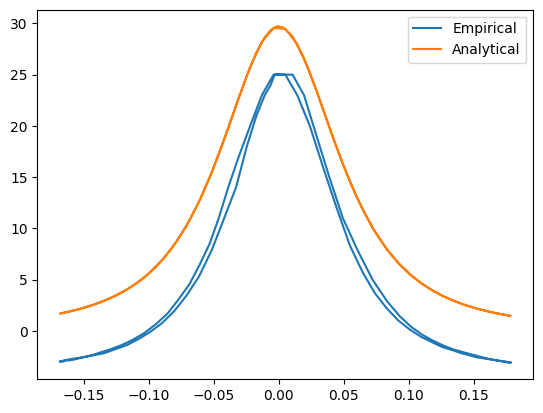

In [287]:
plt.plot(x, B_measured, label='Empirical')
plt.plot(x, B_arr, label='Analytical')
plt.legend()
plt.show()

In [288]:
def Bx(x, a, anti=False):
    """
    x : meters
    anti : tells if coils are oriented the same direction
    """
    factor = N * mu0 * I / (2. * R)
    e1 = (1 + ((x-a/2)/R)**2)**(-1.5)
    e2 = (1 + ((x+a/2)/R)**2)**(-1.5)
  
    if anti:
      return factor * (e1 - e2)
    else:
      return factor * (e1 + e2)

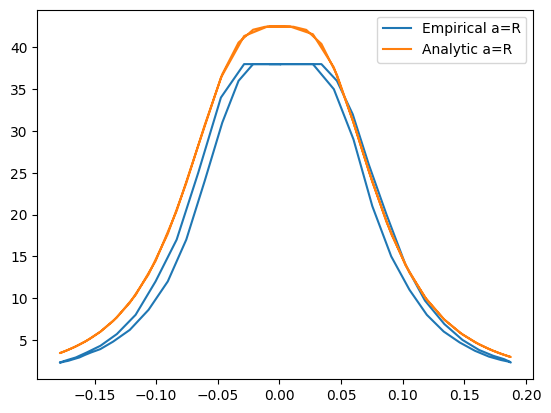

In [289]:
# a = R
data = np.loadtxt('helmholtz.csv', delimiter=',', skiprows=1)
x = data[:,0]
B = data[:,1]*1e6
plt.plot(x, B, label='Empirical a=R')
plt.plot(x, Bx(x,a=R)*1e4, label='Analytic a=R')
plt.legend()
plt.show()

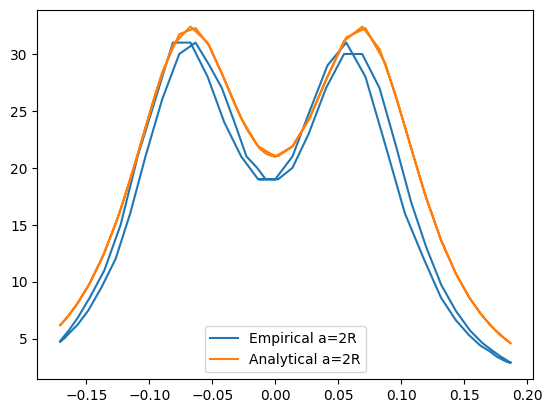

In [290]:
# a = 2R
data = np.loadtxt('helmholtz_2.csv', delimiter=',', skiprows=1)
x = data[:,0]
B = data[:,1]*1e6
plt.plot(x, B, label='Empirical a=2R')
plt.plot(x, Bx(x,a=2*R)*1e4, label='Analytical a=2R')
plt.legend()
plt.show()

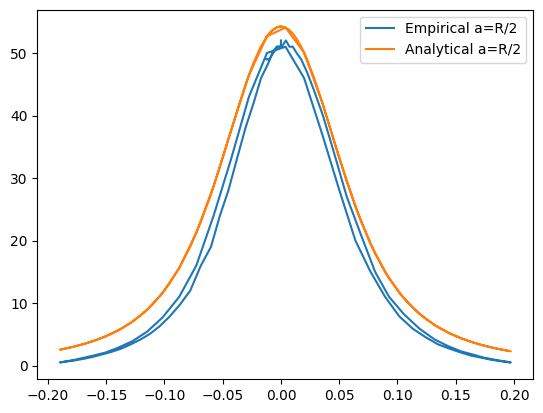

In [291]:
# a = R/2
data = np.loadtxt('helmholtz_3.csv', delimiter=',', skiprows=1)
x = data[:,0]
B = data[:,1]*1e6
plt.plot(x, B, label='Empirical a=R/2')
plt.plot(x, Bx(x,a=R/2)*1e4, label='Analytical a=R/2')
plt.legend()
plt.show()

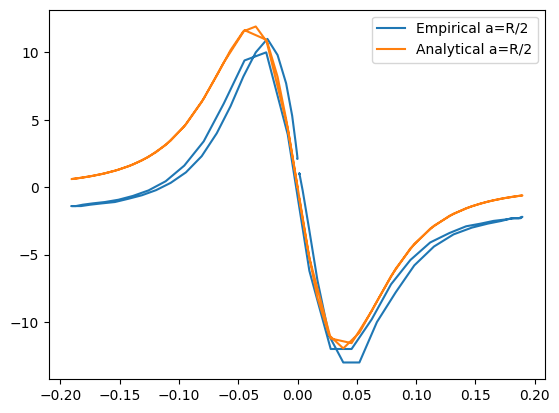

In [292]:
# a = R/2
data = np.loadtxt('anti_helmholtz_1.csv', delimiter=',', skiprows=1)
x = data[:,0]
B = data[:,1]*1e6
plt.plot(x, B, label='Empirical a=R/2')
plt.plot(x, -Bx(x,a=R/2,anti=True)*1e4, label='Analytical a=R/2')
plt.legend()
plt.show()

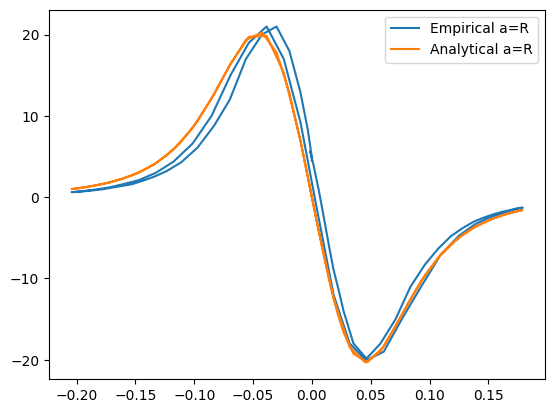

In [293]:
# a = R
data = np.loadtxt('anti_helmholtz_2.csv', delimiter=',', skiprows=1)
x = data[:,0]
B = data[:,1]*1e6
plt.plot(x, B, label='Empirical a=R')
plt.plot(x, -Bx(x,a=R,anti=True)*1e4, label='Analytical a=R')
plt.legend()
plt.show()

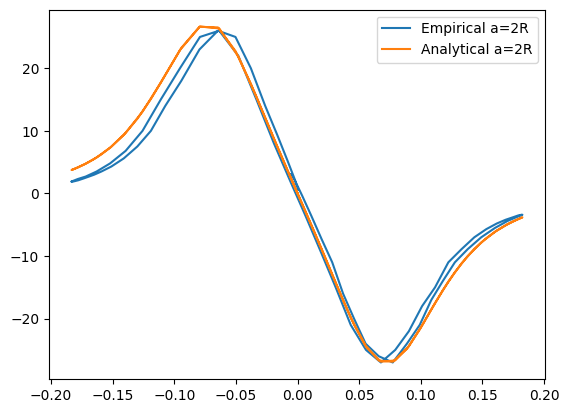

In [294]:
# a = 2R
data = np.loadtxt('anti_helmholtz_3.csv', delimiter=',', skiprows=1)
x = data[:,0]
B = data[:,1]*1e6
plt.plot(x, B, label='Empirical a=2R')
plt.plot(x, -Bx(x,a=2*R,anti=True)*1e4, label='Analytical a=2R')
plt.legend()
plt.show()

In [295]:
# Task 4


# a = 2R
Bx_1 = Bx(x, 2*R)*1e4
Bx_measured_1 = np.zeros_like(x)
delta_B_1 = 100. * (Bx_measured_1 - Bx_1) / Bx_1

# a = R
Bx_2 = Bx(x, R)*1e4
Bx_measured_2 = np.zeros_like(x)
delta_B_2 = 100. * (Bx_measured_2 - Bx_2) / Bx_2

# a = R/2
Bx_3 = Bx(x, R/2)*1e4
Bx_measured_3 = np.zeros_like(x)
delta_B_3 = 100. * (Bx_measured_3 - Bx_3) / Bx_3

d = {
    'x [m]': x,
    'B1 a=2R [gauss]': Bx_1,
    'B1 a=R [gauss]': Bx_2,
    'B1 a=R/2 [gauss]': Bx_3,
    'B2 a=2R målt [gauss]': Bx_measured_1,
    'B2 a=R målt [gauss]': Bx_measured_2,
    'B2 a=R/2 målt [gauss]': Bx_measured_3,
    'Delta B a=2R [%]': delta_B_1,
    'Delta B a=R [%]': delta_B_2,
    'Delta B a=R/2 [%]': delta_B_3,
}
df = pd.DataFrame(data=d)
df  

,x [m],B1 a=2R [gauss],B1 a=R [gauss],B1 a=R/2 [gauss],B2 a=2R målt [gauss],B2 a=R målt [gauss],B2 a=R/2 målt [gauss],Delta B a=2R [%],Delta B a=R [%],Delta B a=R/2 [%]
0,0.000037,21.001078,42.503180,54.236657,0.0,0.0,0.0,-100.0,-100.0,-100.0
1,0.000075,21.001099,42.503180,54.236610,0.0,0.0,0.0,-100.0,-100.0,-100.0
2,0.000075,21.001099,42.503180,54.236610,0.0,0.0,0.0,-100.0,-100.0,-100.0
3,0.000112,21.001132,42.503180,54.236533,0.0,0.0,0.0,-100.0,-100.0,-100.0
4,0.000112,21.001132,42.503180,54.236533,0.0,0.0,0.0,-100.0,-100.0,-100.0
...,...,...,...,...,...,...,...,...,...,...
106,-0.005600,21.151974,42.501189,53.891685,0.0,0.0,0.0,-100.0,-100.0,-100.0
107,-0.005600,21.151974,42.501189,53.891685,0.0,0.0,0.0,-100.0,-100.0,-100.0
108,-0.005600,21.151974,42.501189,53.891685,0.0,0.0,0.0,-100.0,-100.0,-100.0
109,-0.005600,21.151974,42.501189,53.891685,0.0,0.0,0.0,-100.0,-100.0,-100.0


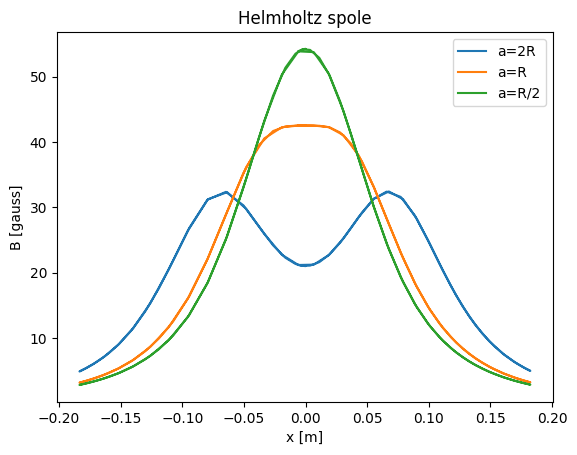

In [296]:
plt.plot(x, df['B1 a=2R [gauss]'], label='a=2R')
plt.plot(x, df['B1 a=R [gauss]'], label='a=R')
plt.plot(x, df['B1 a=R/2 [gauss]'], label='a=R/2')
plt.xlabel('x [m]')
plt.ylabel('B [gauss]')
plt.title('Helmholtz spole')
plt.legend()
plt.show()

In [297]:
# Task 5

# a = 2R
Bx_1 = Bx(x, 2*R, anti=True)*1e4
Bx_measured_1 = np.zeros_like(x)
delta_B_1 = 100. * (Bx_measured_1 - Bx_1) / Bx_1

# a = R
Bx_2 = Bx(x, R, anti=True)*1e4
Bx_measured_2 = np.zeros_like(x)
delta_B_2 = 100. * (Bx_measured_2 - Bx_2) / Bx_2

# a = R/2
Bx_3 = Bx(x, R/2, anti=True)*1e4
Bx_measured_3 = np.zeros_like(x)
delta_B_3 = 100. * (Bx_measured_3 - Bx_3) / Bx_3

d = {
    'x [m]': x,
    'B1 a=2R [gauss]': Bx_1,
    'B1 a=R [gauss]': Bx_2,
    'B1 a=R/2 [gauss]': Bx_3,
    'B2 a=2R målt [gauss]': Bx_measured_1,
    'B2 a=R målt [gauss]': Bx_measured_2,
    'B2 a=R/2 målt [gauss]': Bx_measured_3,
    'Delta B a=2R [%]': delta_B_1,
    'Delta B a=R [%]': delta_B_2,
    'Delta B a=R/2 [%]': delta_B_3,
}
df = pd.DataFrame(data=d)
df 

,x [m],B1 a=2R [gauss],B1 a=R [gauss],B1 a=R/2 [gauss],B2 a=2R målt [gauss],B2 a=R målt [gauss],B2 a=R/2 målt [gauss],Delta B a=2R [%],Delta B a=R [%],Delta B a=R/2 [%]
0,0.000037,0.016876,0.027323,0.020510,0.0,0.0,0.0,-100.0,-100.0,-100.0
1,0.000075,0.033752,0.054647,0.041019,0.0,0.0,0.0,-100.0,-100.0,-100.0
2,0.000075,0.033752,0.054647,0.041019,0.0,0.0,0.0,-100.0,-100.0,-100.0
3,0.000112,0.050628,0.081970,0.061529,0.0,0.0,0.0,-100.0,-100.0,-100.0
4,0.000112,0.050628,0.081970,0.061529,0.0,0.0,0.0,-100.0,-100.0,-100.0
...,...,...,...,...,...,...,...,...,...,...
106,-0.005600,-2.523449,-4.052481,-3.023309,0.0,0.0,0.0,-100.0,-100.0,-100.0
107,-0.005600,-2.523449,-4.052481,-3.023309,0.0,0.0,0.0,-100.0,-100.0,-100.0
108,-0.005600,-2.523449,-4.052481,-3.023309,0.0,0.0,0.0,-100.0,-100.0,-100.0
109,-0.005600,-2.523449,-4.052481,-3.023309,0.0,0.0,0.0,-100.0,-100.0,-100.0


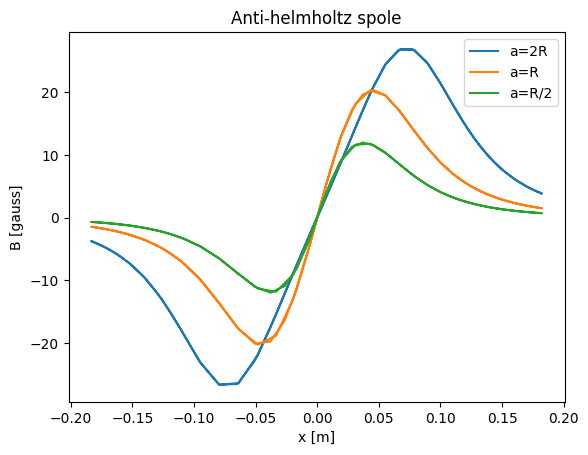

In [298]:
plt.plot(x, df['B1 a=2R [gauss]'], label='a=2R')
plt.plot(x, df['B1 a=R [gauss]'], label='a=R')
plt.plot(x, df['B1 a=R/2 [gauss]'], label='a=R/2')
plt.xlabel('x [m]')
plt.ylabel('B [gauss]')
plt.title('Anti-helmholtz spole')
plt.legend()
plt.show()